In [27]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

boston = load_boston()

In [20]:
import numpy as np
import pandas as pd

columns = ['target'] + list(boston.feature_names)

df = pd.DataFrame(data=np.c_[boston.target, boston.data],
                  columns=columns)

df

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [59]:
# 1. Построить модель линейной регрессии
X = df[['NOX']]
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

model = LinearRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [60]:
# 2. Получить коэффиценты уравнения линейной регрессии
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1):  [-35.8202258]
Свободный коэффицент уравнения w0: 42.79816531006693


In [61]:
# 3. Написать уравнение линейной регрессии

# 42.79816531006693 + -35.8202258*x

In [62]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


array([28.14769296, 26.75070415, 27.46710867, 15.21659144, 24.02836699,
       18.47623199, 21.1269287 , 22.02243435, 17.07924318, 21.1269287 ,
       28.07605251, 23.52688383, 17.25834431, 21.1269287 , 17.97474883,
       18.7627938 , 28.47007499, 26.17758054, 28.54171544, 27.43128844,
       26.71488393, 20.44634441, 27.89336935, 25.28207489, 17.07924318,
       24.35074902, 27.35964799, 20.19560283, 21.1269287 , 23.52688383,
       24.52985015, 24.17164789, 24.74477151, 27.46710867, 20.44634441,
       24.35074902, 24.17164789, 20.9836478 , 28.07605251, 28.00441205,
       20.44634441, 27.11248843, 23.2045018 , 27.53874912, 26.85816483,
       21.84333322, 23.52688383, 23.52688383, 23.74180518, 25.28207489,
       24.74477151, 24.17164789, 28.11187273, 25.46117602, 24.52985015,
       28.7566368 , 21.41349051, 23.09704112, 24.74477151, 28.07605251,
       17.97474883, 16.29119822, 24.63731083, 17.07924318, 23.31196247,
       27.07308618, 24.63731083, 26.85816483, 25.28207489, 25.89

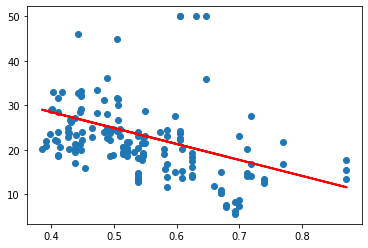

In [63]:
# 4. Визуализировать данные и полученное уравнение линейной регрессии

plt.scatter(X_test['NOX'], y_test)
plt.plot(X_test['NOX'], y_pred, color='red', linewidth=2);
plt.show()

In [83]:
y_test

67     22.0
46     20.0
243    23.7
363    16.8
12     21.7
       ... 
35     18.9
316    17.8
406    11.9
379    10.2
416     7.5
Name: target, Length: 152, dtype: float64

In [84]:
# 5. Посчитать в ручную MSE (расчеты привести в ноутбуке)
t=(y_test - y_pred)**2
t.sum()/152


60.62816079555006

In [85]:
# 6. Посчитать MSE, MAE, R2 с использованием встроенных методов библиотеки sklearn и сделать вывод по полученным метрикам.

y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 5.702563179943188
Mean Squared Error: 60.62816079555006
R2 score: 0.11662768105653964


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [86]:
# Очень интресно, но ничего не понятно.
# Вывод: R2 > 0 |=> всё хорошо, хоть и далеко от идеала (единицы)